# Pentathlon II: Testing for the best frequency

In [2]:
# loading required python packages
# you can add more packages as needed but *only* use packages 
# that are already part of the docker computing environment
import numpy as np
import pandas as pd
import seaborn as sns

### Question 1: Calculate the CLV over 8 weeks for each email frequency

In [3]:
# load data from the excel file here
email = pd.read_excel('data/pentathlon-II.xls',header = None)
email = email.T

In [4]:
# create a founction to extract data of each condition from 'email'
def select_data(i,n):
    email_n = email.iloc[1:9,i:i+3].reset_index(drop=True).rename(columns={i:'attrition', i+1:'avg_rev_sub', i+2:'avg_rev_unsub'})
    return(email_n)

In [5]:
one = select_data(1,1)
two = select_data(6,2)
three = select_data(11,3)
four = select_data(16,4)
five = select_data(21,5)

In [6]:
# list your assumptions here
n_week = 8
time = np.arange(1, n_week + 1)
annual_discount_rate = 0.1 
week_discount_rate = pow((annual_discount_rate+1), (1/52)) - 1
good_cost = 0.6
discount_num = np.arange(0.5,8.5,1)

Assumption:

(1) It’s assumed the beginning of week 1 is our ‘Present’. So for the churn rate, those of subscribed customers and unsubscribed customers for week 1 are 100% and 0% respectively. Also, since customers who request unsubscribe would continue to receive emails until the end of the week, the attrition rate would be changed weekly. 

(2) For the annual discount rate, it is assumed to be 10%. And since the payment is made during each week, it seems to be more reasonable to use half-one power(eg.:0.5, 1.5, 2.5...) when calculating the present value.

[present profit = profit / ((1+week_discount_rate)^ weekly half-one power)]

In [7]:
# calculate CLV for each of the 5 e-mail frequencies and combine the result in a dataframe
# define a function to avoid repetitive code
# note that the function must be defined in a cell above the code that calls the function
# or, even better, in a python package https://www.tutorialsteacher.com/python/python-package

def CLV(df, n_week, discount_num):
    attrition = [0] * n_week 
    attrition[1:8] = df.attrition[0:7]
    attrition = np.array(attrition)
    avg_rev_sub = df.avg_rev_sub
    avg_rev_unsub = df.avg_rev_unsub
    retention_rate = (1 - attrition).cumprod()
    rev_sub = avg_rev_sub * retention_rate
    rev_unsub = avg_rev_unsub * (1 - retention_rate)
    total_revenue = rev_sub + rev_unsub
    profit = total_revenue * (1 - good_cost)
    p_profit = profit / np.power((1+week_discount_rate), discount_num)
    clv = p_profit.cumsum(axis=0)
    return clv

In [8]:
# combine the CLV data into a pandas dataframe `CLV_8weeks` 
# whith shape (8, 1)
CLV_8weeks_1 = pd.DataFrame(CLV(one,n_week,discount_num),columns = ['CLV'])
CLV_8weeks_2 = pd.DataFrame(CLV(two,n_week,discount_num),columns = ['CLV'])
CLV_8weeks_3 = pd.DataFrame(CLV(three,n_week,discount_num),columns = ['CLV'])
CLV_8weeks_4 = pd.DataFrame(CLV(four,n_week,discount_num),columns = ['CLV'])
CLV_8weeks_5 = pd.DataFrame(CLV(five,n_week,discount_num),columns = ['CLV'])

In [9]:
# create an integrated dataframe
CLV_8weeks_all = pd.DataFrame(
{    'one_email': CLV_8weeks_1['CLV'],
     'two_email': CLV_8weeks_2['CLV'],
     'three_email': CLV_8weeks_3['CLV'],
     'four_email': CLV_8weeks_4['CLV'],
     'five_email': CLV_8weeks_5['CLV'],
}
)
CLV_8weeks_all.index = [f"Week{x}" for x in range(1,9)]
CLV_8weeks_all

,one_email,two_email,three_email,four_email,five_email
Week1,0.115894,0.139872,0.147864,0.143868,0.143868
Week2,0.239335,0.259279,0.270128,0.277191,0.272110
Week3,0.358297,0.397659,0.409457,0.391682,0.385031
Week4,0.484524,0.550547,0.559069,0.531438,0.522659
Week5,0.598461,0.671557,0.682616,0.670685,0.650240
Week6,0.700280,0.799185,0.810303,0.787026,0.774683
Week7,0.805389,0.933803,0.944781,0.907076,0.888887
Week8,0.913969,1.063883,1.072293,1.027585,0.995609


Text(0, 0.5, 'CLV per customer')

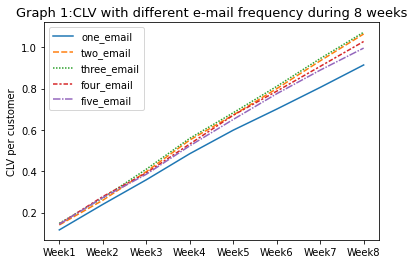

In [10]:
# use seaborn to create a line chart that shows CLV over the 8 week period
# for each of the 5 email frequencies (i.e., 1 plot with 5 lines)
CLV_8weeks_all = CLV_8weeks_all.astype(float)
ax =sns.lineplot(data = CLV_8weeks_all)
ax.set_title('Graph 1:CLV with different e-mail frequency during 8 weeks',size=13)
ax.set_ylabel('CLV per customer')

### Question 2: What e-mail frequency should Pentathlon adopt based on the available data?

Pentathlon should adopt a 3-email per week frequency based on the available data since it shows the highest CLV(\$1.072 per customer) for eight weeks.

Look through the data of attrition rate and average revenue, it is obvious that higher email frequency leads to higher churn rate, but higher revenue from both subscribed and unsubscribed customers. So 3-email per week frequency seems to be an ideal balance for attrition and revenue.

### Question 3: What e-mail frequency would you recommend if you considered a longer time horizon?

In [11]:
CLV(three,n_week,discount_num) - CLV(two,n_week,discount_num)

0    0.007993
1    0.010849
2    0.011798
3    0.008522
4    0.011059
5    0.011118
6    0.010977
7    0.008410
dtype: object

Considering a longer time horizon, 2-email per week frequency should be recommended.

Focus on the difference between CLV of 3-email and 2-email frequency, it tends to decrease as time goes. And it is highly possible that CLV of 2-email frequency would be greater than 3-email one. So, in a long run, it is reasonable to make a recommendation on 2-email frequency.

### Question 4: CLV over 104 weeks

Calculate the CLV for each of the 5 plans after 104 weeks using the average churn and revenue numbers from `pentathlon-II-avg.csv` in the git repo. Generate a line plot to compare the five CLV curves. Are your results consistent with your answer to question 3? Why (or why not)? 

In [44]:
# load data from the excel file here
avg = pd.read_csv('data/pentathlon-II-avg.csv')

In [68]:
# list your assumptions here
n_week_104 = 104
time = np.arange(1, n_week + 1)
annual_discount_rate = 0.1 
week_discount_rate = pow((annual_discount_rate+1), (1/52)) - 1
good_cost = 0.6
discount_num_104 = np.arange(0.5,104.5,1)

Assumption:

(1) It’s assumed the beginning of week 1 is our ‘Present’. So for the churn rate, those of subscribed customers and unsubscribed customers for week 1 are 100% and 0% respectively. Also, since the given 'schurn' seems to be average weekly churn rate of subscribed customers, the attrition rate is assumed to be the same in the remaining 103 weeks.

(2) For the annual discount rate, it is assumed to be 10%. And since the payment is made during each week, it seems to be more reasonable to use half-one power(eg.:0.5, 1.5, 2.5...) when calculating the present value.

[present profit = profit / ((1+week_discount_rate)^ weekly half-one power)]

In [69]:
# calculate CLV for each of the 5 e-mail frequencies and combine the result in a dataframe
# define a function to avoid repetitive code
# note that the function must be defined in a cell above the code that calls the function
# or, even better, in a python package https://www.tutorialsteacher.com/python/python-package

def CLV1(i, n_week, discount_num):
    attrition = np.repeat(avg.schurn[i], n_week)
    attrition[0] = 0
    avg_rev_sub = np.repeat(avg.rev_sub[i], n_week)
    avg_rev_unsub = np.repeat(avg.rev_unsub[i], n_week)
    retention_rate = (1 - attrition).cumprod()
    rev_sub = avg_rev_sub * retention_rate
    rev_unsub = avg_rev_unsub * (1 - retention_rate)
    total_revenue = rev_sub + rev_unsub
    profit = total_revenue * (1 - good_cost)
    p_profit = profit / np.power((1+week_discount_rate), discount_num)
    clv = p_profit.cumsum(axis=0)
    return clv

In [73]:
CLV_104weeks_1 = CLV1(0,n_week_104,discount_num_104)
CLV_104weeks_2 = CLV1(1,n_week_104,discount_num_104)
CLV_104weeks_3 = CLV1(2,n_week_104,discount_num_104)
CLV_104weeks_4 = CLV1(3,n_week_104,discount_num_104)
CLV_104weeks_5 = CLV1(4,n_week_104,discount_num_104)

In [74]:
# create an integrated dataframe
CLV_104weeks_all = pd.DataFrame(
{    'one_email': CLV_104weeks_1,
     'two_email': CLV_104weeks_2,
     'three_email': CLV_104weeks_3,
     'four_email': CLV_104weeks_4,
     'five_email': CLV_104weeks_5,
}
)
CLV_104weeks_all

,one_email,two_email,three_email,four_email,five_email
0,0.115895,0.135878,0.142365,0.141933,0.143382
1,0.231309,0.270974,0.282460,0.280432,0.281429
2,0.346243,0.405293,0.420339,0.415626,0.414441
3,0.460701,0.538841,0.556058,0.547637,0.542704
4,0.574685,0.671624,0.689668,0.676586,0.666486
...,...,...,...,...,...
99,9.555871,10.490329,8.340831,7.260058,6.365888
100,9.633861,10.570305,8.395244,7.307726,6.409727
101,9.711559,10.649898,8.449406,7.355243,6.453472
102,9.788966,10.729110,8.503323,7.402612,6.497125


Text(0, 0.5, 'CLV per customer')

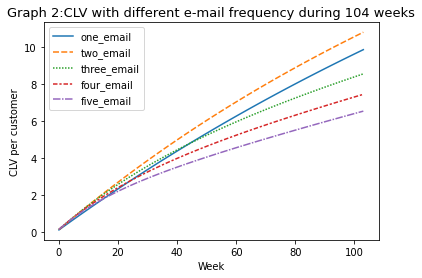

In [77]:
# use seaborn to create a line chart that shows CLV over the 104 week period
# for each of the 5 email frequencies (i.e., 1 plot with 5 lines)
CLV_104weeks_all = CLV_104weeks_all.astype(float)
ax =sns.lineplot(data = CLV_104weeks_all)
ax.set_title('Graph 2:CLV with different e-mail frequency during 104 weeks',size=13)
ax.set_xlabel('Week')
ax.set_ylabel('CLV per customer')

Are your results consistent with your answer to question 3? Why (or why not)? 

The result is consistent with Question 3. In a long-term, CLV of 2-email per week frequency is the highest. The reason might be that when using average churn rate to calculate long-term CLV, the average churn rate of 2-email is greatly lower than that of 3-email, but the differences between revenues are not too large. Thus, it seems to be reasonable that the CLV of 2-email frequency is greater than 3-email one in a long-run.


### Question 5: Limitations

Discuss at least two limitations of the experiment. How would you address these limitations?

1. In this experiment, Pentathlon only send the email including one of the seven products. If the customers are not interested in this product, it is highly possible to unsubscribe the e-mail. So if Pentathlon change the email contents of different product, the average churn rate may be different from the current one. It might be more helpful to get the average churn rate and find the best email frequency.

2. When calculating CLV during 104 weeks, the same subscriber churn rate and average revenue are used for all the weeks. However, it is not clear that whether these merits will change as time goes, or the given data comes from the peak season, which leads to an unreasonable conclusion. It would be ideal for Pentathlon to record data for continuous 104 weeks, which would help improve the accuracy of analysis.
